# Práctica 3

- Integrantes:
  - Juan Carlos Charro
  - Julio Arevalo
  - Fabian Soto
  

- Dataset: Rankings de empresas en Ecuador en los años 2010-2016

**¿Por qué este dataset es de interés?**

Este dataset es valioso porque constituye una radiografía del ecosistema empresarial ecuatoriano entre 2010 y 2016, un período de transformaciones económicas significativas.

**Razones principales:**

**Análisis económico y sectorial:**
Permite estudiar el desempeño de distintos sectores (industria, comercio, agricultura, servicios, etc.) en función de ventas, utilidades, patrimonio y empleo.

**Distribución geográfica y social:**
Al incluir provincia, ciudad y región, facilita entender la concentración de empresas, brechas territoriales y oportunidades de desarrollo regional.

**Estudios de sostenibilidad empresarial:**
Con datos de activos, patrimonio y utilidades se pueden evaluar tasas de supervivencia, resiliencia y competitividad en el tiempo.

**Política pública y tributación:**
Las variables de impuestos y utilidades ayudan a estimar la contribución empresarial al fisco y a evaluar reformas económicas del periodo.

**Investigación académica y aplicada:**
Es un insumo robusto para investigaciones en economía, administración, sociología y planificación territorial, además de servir como benchmark para políticas de fomento productivo.

# EDA

In [21]:
df = pd.read_csv(
    '/content/combined_ranking_data.csv',
    delimiter=';',
    encoding='utf-8',
    header=0   # ← le dice a pandas que la fila 0 es el encabezado
)

In [22]:
# Estructura del dataframe
df.head(5)

,Posicion,Anio,Posicion_1,Anio_1,Expediente,Nombre,Tipo Compania,Actividad economica,Region,Provincia,...,Sector,Cant_Empleados,Activio,Patrimonio,Ingreso_por_ventas,Utilidad_antes_del_impuesto,Utilidad_del_ejercicio,Utilidad_neta,IR_causado,Ingreso_Total
0,0,0,0,0,181,COMPANIA EMBOTELLADORA INDUSTRIAL LICORERA MAN...,ANÓNIMA,C1101.01 - ELABORACIÓN DE BEBIDAS ALCOHÓLICAS ...,COSTA,MANABI ...,...,SOCIETARIO,22.0,4.900455e+06,1.625642e+06,2.195440e+06,1.442343e+05,1.696875e+05,6.272201e+04,106226.79,2.195440e+06
1,0,0,0,0,216,C.A. ECUATORIANA DE CERAMICA,ANÓNIMA,C2392.01 - FABRICACIÓN DE LOSETAS PARA LA PARE...,SIERRA,AZUAY ...,...,SOCIETARIO,453.0,1.111928e+08,8.837120e+07,3.886819e+07,1.406302e+06,8.272362e+05,3.758310e+05,327319.72,3.948296e+07
2,0,0,0,0,21365,COMPANIA AGRICOLA CIVIL SAN JOSE CIA LTDA,RESPONSABILIDAD LIMITADA,G4630.99 - VENTA AL POR MAYOR DE OTROS PRODUCT...,COSTA,GUAYAS ...,...,SOCIETARIO,4.0,4.000000e+03,4.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00
3,1,2023,1,2022,384,CORPORACION FAVORITA C.A.,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,...,MERCADO DE VALORES,12343.0,2.564376e+09,1.785967e+09,2.483015e+09,2.093388e+08,2.462809e+08,1.652348e+08,47338195.86,2.483015e+09
4,2,2023,2,2022,6796,ECUACORRIENTE S.A.,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,...,SOCIETARIO,1326.0,2.070951e+09,1.558133e+09,1.155606e+09,4.464486e+08,5.276557e+08,3.538614e+08,93414106.46,1.155606e+09


In [23]:
df['Posicion'].max()

16732

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387045 entries, 0 to 387044
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Posicion                     387045 non-null  int64  
 1   Anio                         387045 non-null  int64  
 2   Posicion_1                   387045 non-null  int64  
 3   Anio_1                       387045 non-null  int64  
 4   Expediente                   387045 non-null  int64  
 5   Nombre                       387045 non-null  object 
 6   Tipo Compania                387045 non-null  object 
 7   Actividad economica          387045 non-null  object 
 8   Region                       387045 non-null  object 
 9   Provincia                    387045 non-null  object 
 10  Ciudad                       387045 non-null  object 
 11  Tamano                       331652 non-null  object 
 12  Sector                       387045 non-null  object 
 13 

- Después de analizar la estructura del dataframe podemos ver que todas las columnas a excepción de 'Tamano' se encuentran completas, sin nulos que tratar

## Variables categóricas

In [24]:
# Identificar variables categóricas
vars_categoricas = df.select_dtypes(include=['object']).columns.tolist()
vars_categoricas

['Nombre',
 'Tipo Compania',
 'Actividad economica',
 'Region',
 'Provincia',
 'Ciudad',
 'Tamano',
 'Sector']

In [25]:
resumen_categoricas = {}
for var in vars_categoricas:
  print(f"\n VARIABLE: {var.upper()}")
  print("-" * 50)

  # Estadísticas básicas
  total_valores = len(df[var])
  valores_unicos = df[var].nunique()
  valores_nulos = df[var].isnull().sum()
  porcentaje_nulos = (valores_nulos / total_valores) * 100
  print(f"• Total de registros: {total_valores:,}")
  print(f"• Valores únicos: {valores_unicos:,}")
  print(f"• Valores nulos: {valores_nulos:,} ({porcentaje_nulos:.2f}%)")

  # Top 10 valores más frecuentes
  top_valores = df[var].value_counts().head(10)
  print(f"\n Top 10 valores más frecuentes:")
  for i, (valor, freq) in enumerate(top_valores.items(), 1):
      porcentaje = (freq / total_valores) * 100
      print(f"   {i:2d}. {str(valor)[:50]:50} | {freq:8,} ({porcentaje:5.2f}%)")

  # Guardar información para análisis posterior
  resumen_categoricas[var] = {
      'valores_unicos': valores_unicos,
      'valores_nulos': valores_nulos,
      'porcentaje_nulos': porcentaje_nulos,
      'top_valores': top_valores,
      'concentracion': (top_valores.iloc[0] / total_valores) * 100 if len(top_valores) > 0 else 0
  }


 VARIABLE: NOMBRE
--------------------------------------------------
• Total de registros: 16,749
• Valores únicos: 16,735
• Valores nulos: 0 (0.00%)

 Top 10 valores más frecuentes:
    1. IMPRODECU IMPORTADORA DE PRODUCTOS DE CUERO S.A.   |        4 ( 0.02%)
    2. PAEZAUTOS CIA.LTDA.                                |        2 ( 0.01%)
    3. GRUPO SANCHEZ VERA CIA. LTDA.                      |        2 ( 0.01%)
    4. PLAYAMOLT S.A.                                     |        2 ( 0.01%)
    5. BOLSA DE VALORES DE GUAYAQUIL S.A. BVG             |        2 ( 0.01%)
    6. CAPELITI S.A.                                      |        2 ( 0.01%)
    7. AIFA S.A.                                          |        2 ( 0.01%)
    8. AGROPECUARIA ALEMANA CA AGROALEMANA                |        2 ( 0.01%)
    9. PROYECTO HIDROELECTRICO SANTA CRUZ S.A. HIDROCRUZ  |        2 ( 0.01%)
   10. BINGAMES S.A.                                      |        2 ( 0.01%)

 VARIABLE: TIPO COMPANIA
----------

- Tamano es la única columna que tiene un porcentaje de nulos, 14%.

- Sector tiene una alta concentración de datos en el valor "1. SOCIETARIO"

### Limpieza y exploración de asociaciones

- La única acción de limpieza que se decide realizar es una modificación de la columna 'Tamano' para cubrir los valores nulos por valores 'Desconocido'. Esto permite mantener la integridad de los datos.


In [26]:
df['Tamano'] = df['Tamano'].fillna('Desconocido')

In [27]:
# Separar la columna en código y descripción
df[['Codigo_Actividad', 'Nombre_Actividad']] = df['Actividad economica'].str.split(' - ', n=1, expand=True)

In [28]:
# Eliminar columna original
df = df.drop('Actividad economica', axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16749 entries, 0 to 16748
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Posicion                     16749 non-null  int64  
 1   Anio                         16749 non-null  int64  
 2   Posicion_1                   16749 non-null  int64  
 3   Anio_1                       16749 non-null  int64  
 4   Expediente                   16749 non-null  int64  
 5   Nombre                       16749 non-null  object 
 6   Tipo Compania                16749 non-null  object 
 7   Region                       16748 non-null  object 
 8   Provincia                    16748 non-null  object 
 9   Ciudad                       16748 non-null  object 
 10  Tamano                       16749 non-null  object 
 11  Sector                       16748 non-null  object 
 12  Cant_Empleados               16748 non-null  float64
 13  Activio         

In [30]:
df.to_csv('enterprise_ranking_2010_2016.csv', index=False, sep=';')

- Para la exploración de asociaciones entre variables categóricas se decidió excluir las variables de alta cardinalidad.
- Se utilizó el método **V de Cramer** para evaluar la fuerza de asociación entre dos variables nominales.
  - **V de Cramer**: se deriva de la estadística de chi-cuadrado y proporciona un valor entre 0 y 1, donde 0 indica que no hay asociación y 1 indica una asociación perfecta

In [31]:
# prompt: Guardar df a un csv pero solo las 10 primeras filas

df.head(10).to_csv('enterprise_ranking_2010_2016_top10.csv', index=False, sep=';')

In [37]:
# Creamos un nuevo dataframe para el análisis visual de asociaciones
vars_alta_cardinalidad = ['Nombre', 'Ciudad']

df_asosiacion = df.drop(columns=vars_alta_cardinalidad)
df_asosiacion.columns

Index(['Posicion', 'Anio', 'Posicion_1', 'Anio_1', 'Expediente',
       'Tipo Compania', 'Region', 'Provincia', 'Tamano', 'Sector',
       'Cant_Empleados', 'Activio', 'Patrimonio', 'Ingreso_por_ventas',
       'Utilidad_antes_del_impuesto', 'Utilidad_del_ejercicio',
       'Utilidad_neta', 'IR_causado', 'Ingreso_Total', 'Codigo_Actividad',
       'Nombre_Actividad'],
      dtype='object')

La exploración de asociaciones se realizará en dos formas:

**1.- Visión Macro:** Calculando la matriz de V de Cramér para todos los pares de variables categóricas relevantes.

**2.- Visión Micro:** para los pares de variables que destacaron en la matriz, crearemos gráficos de barras apiladas al 100% para entender la naturaleza de su relación.

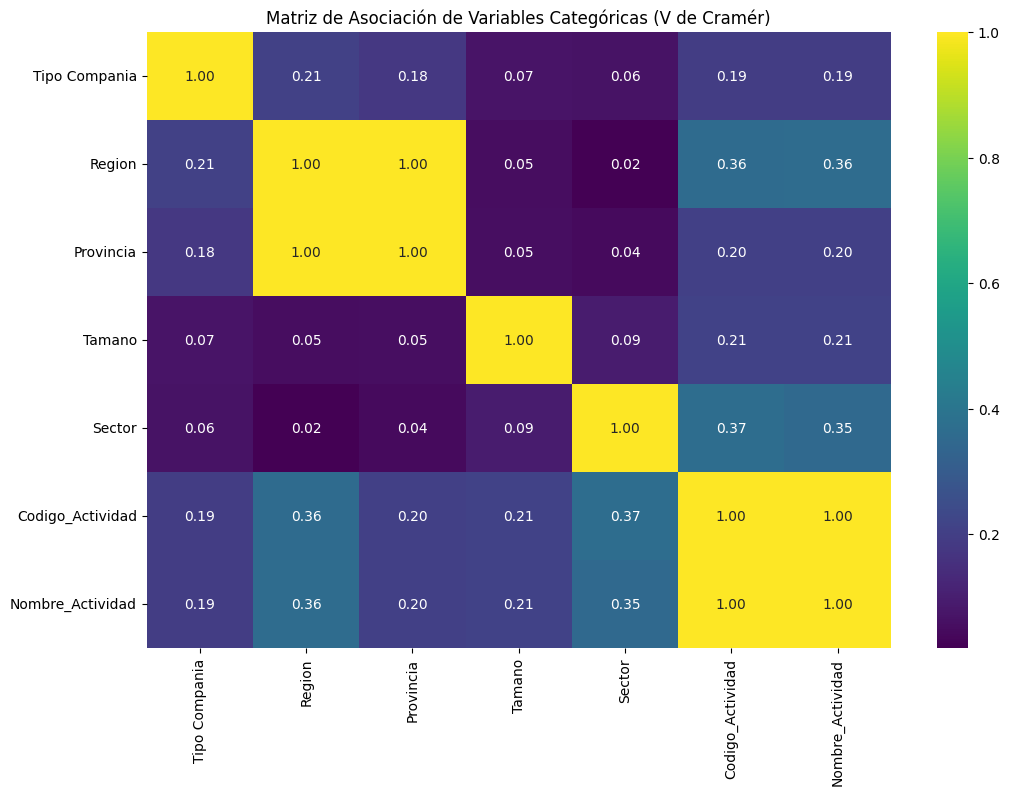

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#Visión Macro

# 1. Identificar las variables categóricas en el DataFrame procesado
vars_categoricas_procesadas = df_asosiacion.select_dtypes(include=['object']).columns.tolist()

# 2. Función para calcular el V de Cramér
def cramers_v(confusion_matrix):
    """ Calcula el V de Cramér para una matriz de contingencia. """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    if min((kcorr-1), (rcorr-1)) == 0:
        return 0
    else:
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 3. Calcular la matriz de asociación
matriz_cramer = pd.DataFrame(index=vars_categoricas_procesadas, columns=vars_categoricas_procesadas, dtype=float)

for col1 in vars_categoricas_procesadas:
    for col2 in vars_categoricas_procesadas:
        if col1 == col2:
            matriz_cramer.loc[col1, col2] = 1.0 # La asociación de una variable consigo misma es 1
            continue

        confusion_matrix = pd.crosstab(df_asosiacion[col1], df_asosiacion[col2])
        matriz_cramer.loc[col1, col2] = cramers_v(confusion_matrix)

# 4. Visualizar la matriz como un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_cramer, annot=True, cmap='viridis', fmt='.2f')
plt.title('Matriz de Asociación de Variables Categóricas (V de Cramér)')
plt.show()

El heatmap muestra que la asociación más destacada es entre Region y Tipo Compania (0.26). Otras relaciones moderadas que podrían ser interesantes son Provincia y Tipo Compania (0.17) y Tamano y Sector (0.15).
- Podemos observar que la mayoría de variables categóricas no poseen una alta asociación.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visión Micro

def graficar_relacion_categorica(df, var_index, var_cols):
    """
    Crea un gráfico de barras apiladas al 100% para visualizar la relación
    entre dos variables categóricas.

    Args:
        df (pd.DataFrame): El DataFrame que contiene los datos.
        var_index (str): El nombre de la columna para el eje X (categorías principales).
        var_cols (str): El nombre de la columna para las barras apiladas (distribución).
    """
    # 1. Crear una tabla de contingencia (crosstab) con las frecuencias
    tabla_contingencia = pd.crosstab(index=df[var_index], columns=df[var_cols])

    # 2. Normalizar la tabla para que cada fila sume 100%
    tabla_porcentajes = tabla_contingencia.div(
        tabla_contingencia.sum(axis=1),
        axis=0
    ) * 100

    # 3. Graficar
    ax = tabla_porcentajes.plot(
        kind='bar',
        stacked=True,
        figsize=(14, 8),
        cmap='viridis' # Usamos la misma paleta de colores que el heatmap
    )

    # 4. Mejorar el formato del gráfico
    plt.title(f'Distribución de "{var_cols}" por cada "{var_index}"', fontsize=16)
    plt.xlabel(var_index, fontsize=12)
    plt.ylabel('Porcentaje (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=var_cols, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout() # Ajusta el gráfico para que todo encaje bien

    # Añadir etiquetas de porcentaje dentro de las barras (opcional, puede ser denso)
    for container in ax.containers:
        # Solo etiquetar si el segmento es mayor a un 5% para no saturar
        ax.bar_label(container, fmt='%.1f%%', label_type='center', color='white', weight='bold',
                     padding=2, fontsize=9,
                     labels=[f'{v:.1f}%' if v > 5 else '' for v in container.datavalues])


    plt.show()

**1. Gráfico: Distribución de "Tipo Compania" por cada "Region"**

El siguiente gráfico nos muestra cómo se distribuyen los tipos de compañía en las cuatro regiones principales de Ecuador.

- División Geográfica Clara: Existe una diferencia muy marcada entre la región COSTA y las demás. En la COSTA, casi el 90% de las empresas son ANÓNIMA.

- Equilibrio entre Sierra y Oriente, poseen un panorama muy similar. La distribución es casi 50/50 entre ANÓNIMA y RESPONSABILIDAD LIMITADA.

- Galápagos como Intermedio: GALAPAGOS se encuentra en un punto medio, con una dominancia de ANÓNIMA (76.4%) pero con una presencia mucho mayor de RESPONSABILIDAD LIMITADA (23.4%) que en la Costa.

- Esto confirma la asociación de 0.26 que vimos en la matriz. La elección de la estructura corporativa en Ecuador no es homogénea, sino que está fuertemente influenciada por la geografía.

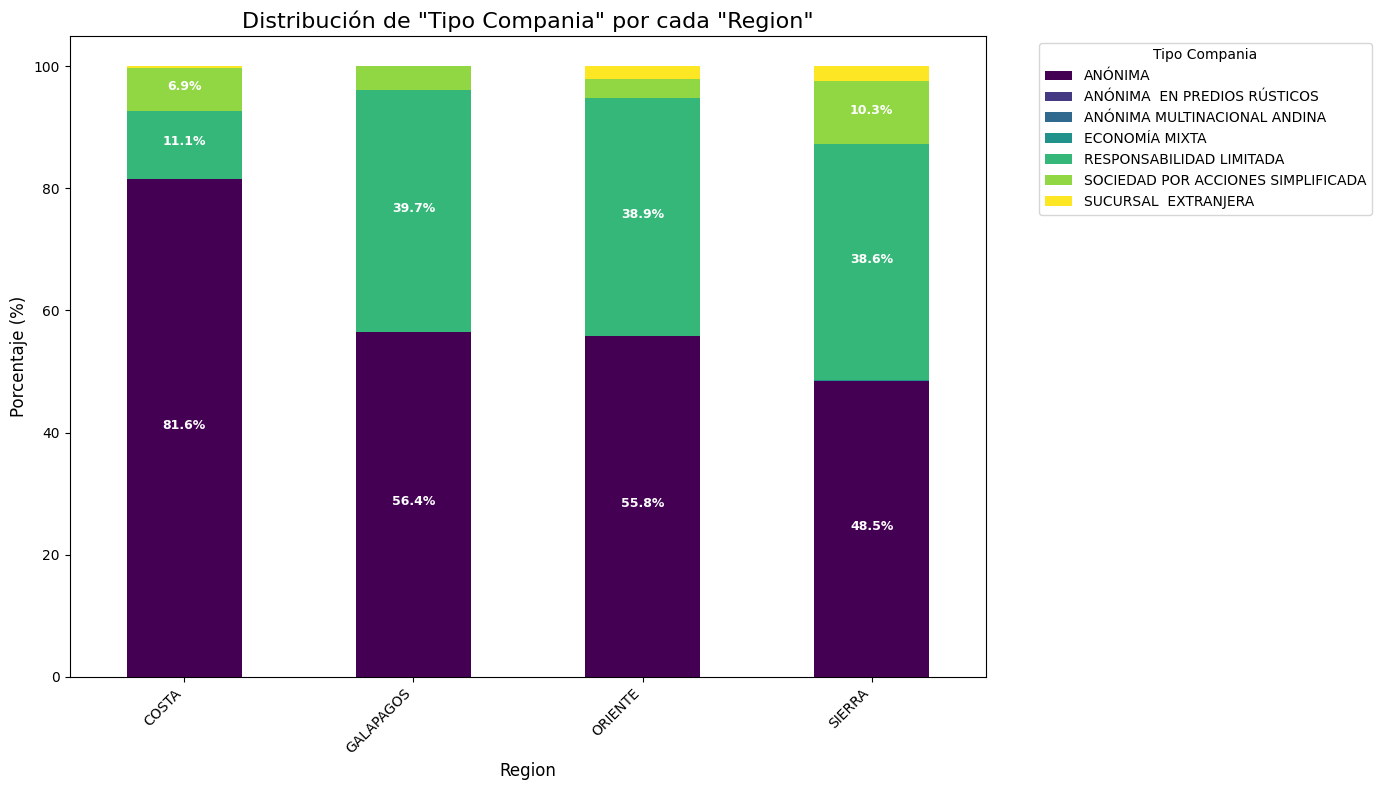

In [40]:
graficar_relacion_categorica(df_asosiacion, var_index='Region', var_cols='Tipo Compania')

**2. Gráfico: Distribución de "Tamano" por cada "Sector"**

Este gráfico compara el tamaño de las empresas que operan en el sector SOCIETARIO general versus las que participan en el MERCADO DE VALORES.

- Los dos sectores tienen perfiles de tamaño casi inversos.
- Sector Societario: Está dominado por MICROEMPRESA (54.0%) y PEQUEÑA (21.2%). Las empresas GRANDE (7.4%) son una minoría.
- Mercado de Valores: las empresas GRANDE (33.2%) y MEDIANA (15.9%) son las protagonistas. Aunque hay microempresas, no son el grupo dominante.

- Hay un alto porcentaje de tamaño 'Desconocido' (26.6%) en el MERCADO DE VALORES, lo cual podría ser un punto a investigar sobre la calidad de los datos en este sector específico.


El resultado es totalmente lógico y esperado. El MERCADO DE VALORES (la bolsa) es, por su naturaleza, un ecosistema para grandes corporaciones que buscan financiamiento a gran escala. En contraste, el sector SOCIETARIO refleja la economía real y completa del país, donde el motor principal son las micro, pequeñas y medianas empresas (MIPYMES).

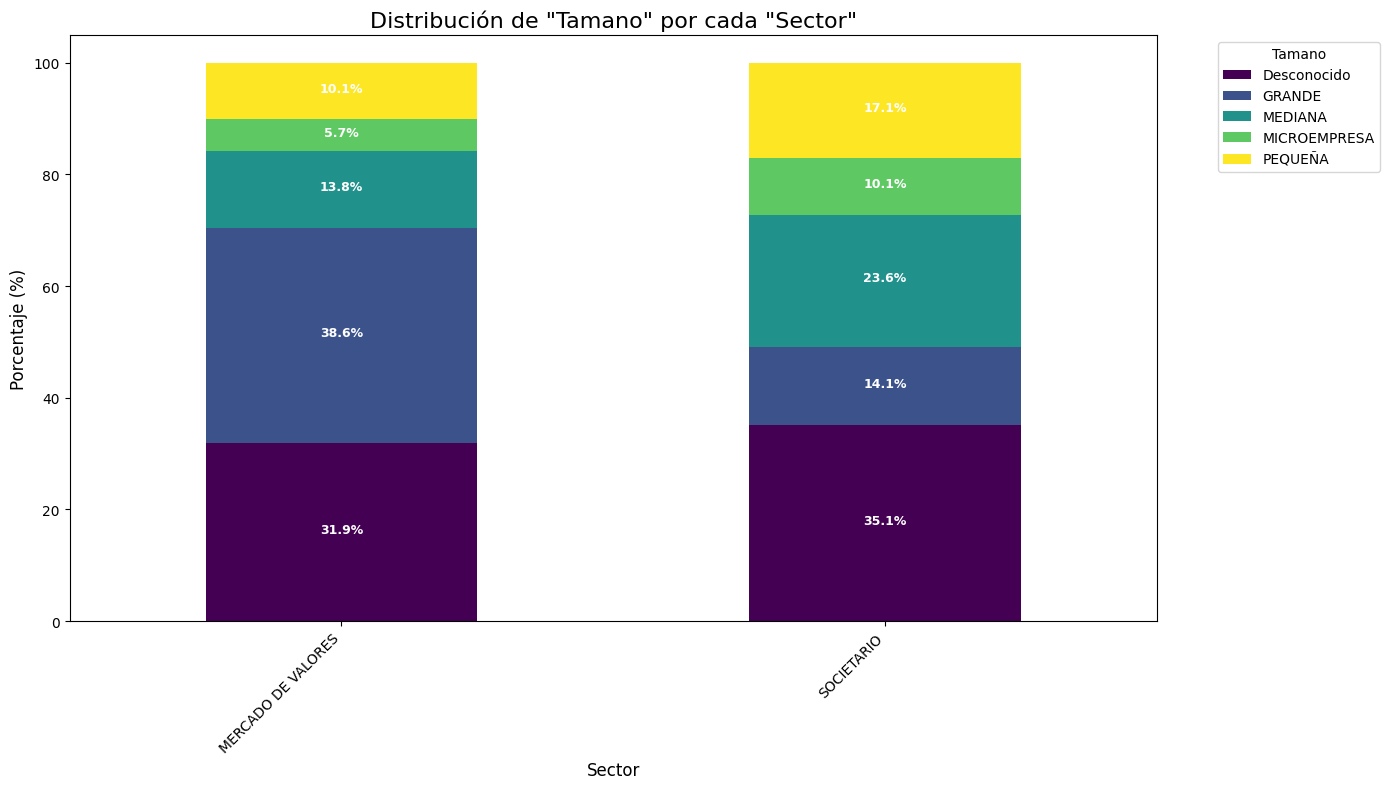

In [41]:
graficar_relacion_categorica(df_asosiacion, var_index='Sector', var_cols='Tamano')

**3. Gráfico: Distribución de "Tamano" por cada "Tipo Compania"**
Muestra qué tamaños de empresa prefieren cada tipo de estructura legal.

- Base de Microempresas: La MICROEMPRESA (color verde) es el segmento más grande en casi todas las formas legales, lo que refuerza la idea de que la economía se basa en pequeños emprendimientos.

- La Gran Excepción: La COMANDITA POR ACCIONES es 100% MICROEMPRESA. Es una estructura legal utilizada exclusivamente por las empresas más pequeñas en este dataset.

- Estructuras de Grandes Empresas: La ECONOMIA MIXTA es la que tiene la mayor proporción de empresas GRANDE y MEDIANA combinadas, lo cual es lógico ya que suelen ser alianzas público-privadas para proyectos de gran tamaño.

- Anónima vs. Limitada: Contrario a lo que se podría pensar, la RESPONSABILIDAD LIMITADA tiene una proporción de empresas GRANDE (8.8%) ligeramente mayor que la ANÓNIMA (6.9%). Ambas estructuras albergan empresas de todos los tamaños, desde micro hasta grandes.

La estructura legal de una compañía no determina su tamaño, pero sí muestra ciertas tendencias.
- No es correcto asumir que 'S.A.' es solo para grandes empresas y 'Cía. Ltda.' solo para pequeñas.
- Estructuras más específicas como 'ECONOMIA MIXTA' o 'COMANDITA POR ACCIONES' sí tienen perfiles de tamaño mucho más definidos y especializados.


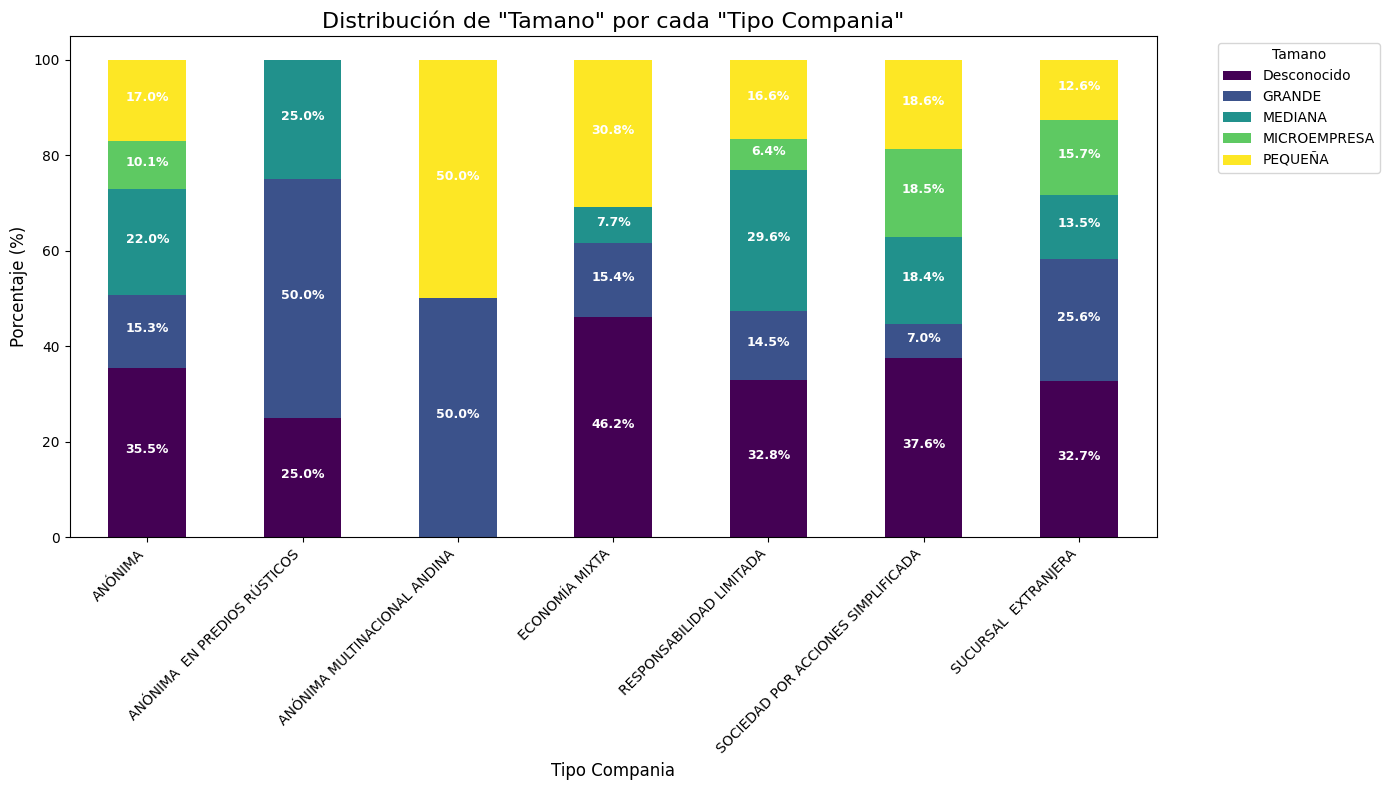

In [42]:
graficar_relacion_categorica(df_asosiacion, var_index='Tipo Compania', var_cols='Tamano')

## Variables numéricas

### Estadísticas básicas

In [43]:
df[["Cant_Empleados", "Activio", "Patrimonio", "Ingreso_por_ventas", "Utilidad_antes_del_impuesto", "Utilidad_del_ejercicio", "Utilidad_neta", "IR_causado", "Ingreso_Total"]].describe()

,Cant_Empleados,Activio,Patrimonio,Ingreso_por_ventas,Utilidad_antes_del_impuesto,Utilidad_del_ejercicio,Utilidad_neta,IR_causado,Ingreso_Total
count,16748.000000,1.674800e+04,1.674800e+04,1.674800e+04,1.674800e+04,1.674800e+04,1.674800e+04,1.674800e+04,1.674800e+04
mean,59.476594,9.645867e+06,4.345274e+06,8.332830e+06,1.888621e+10,6.471342e+05,4.257257e+05,1.565406e+06,8.454576e+06
std,308.565225,4.935747e+07,3.090004e+07,4.658849e+07,1.808850e+12,7.461091e+06,5.178088e+06,1.847739e+08,4.679702e+07
min,1.000000,4.000000e+03,-1.081295e+08,0.000000e+00,-6.658605e+07,-6.658605e+07,-6.658605e+07,0.000000e+00,0.000000e+00
25%,4.000000,1.115070e+06,2.126447e+05,3.447381e+05,0.000000e+00,2.170875e+02,0.000000e+00,0.000000e+00,3.757860e+05
50%,10.000000,2.096696e+06,6.629600e+05,1.449044e+06,1.546249e+04,4.679653e+04,2.647480e+04,7.239935e+03,1.499216e+06
75%,34.000000,5.291992e+06,1.981031e+06,4.275013e+06,1.426499e+05,2.234078e+05,1.410608e+05,4.343059e+04,4.370036e+06
max,20292.000000,2.564376e+09,1.785967e+09,2.483015e+09,2.070326e+14,5.276557e+08,3.538614e+08,2.391179e+10,2.483015e+09


#### Interpretación
**Cant_Empleados**
*   El **mínimo = -1** muestra valores incoherentes
*   Existe un valor atípico extremo **max = 300997**
*   La media está muy por encima de la mediana  

**Activio**
*   Presencia de negativos, habría que considerar si son correctos
*   Demasiada desviación **std = 16 026 070**  

**Patrimonio**
*   Mucha dispersación tanto al extremo superior e inferior

**Ingreso_por_ventas**
*   Distribución fuertemente sesgada: mayoría de empresas tienen ingresos muy bajos, y unas pocas empresas gigantes

**Utilidad_antes_del_impuesto**
*    La media y el máximo son absurdamente altos. Posiblemente hay errores de magnitud (e.g., una fila mal cargada con ceros de más)
*    Mediana en 0 indica que muchas empresas no generan utilidad

**Utilidad_del_ejercicio**
*    Negativos bastante altos

**IR_causado**
*    Negativos en impuestos es extraño




### Verificación de Outliers

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas numéricas a analizar
cols_numericas = [
    'Cant_Empleados', 'Activio', 'Patrimonio',
    'Ingreso_por_ventas', 'Utilidad_antes_del_impuesto',
    'Utilidad_del_ejercicio', 'Utilidad_neta',
    'IR_causado', 'Ingreso_Total'
]

# Detectar outliers con IQR
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return (serie < lim_inf) | (serie > lim_sup)

# DataFrame con booleanos: True si es outlier
df_outliers = df[cols_numericas].apply(detectar_outliers_iqr)

# Conteo de outliers por columna
outlier_counts = df_outliers.sum().sort_values(ascending=False)
print("\n Número de outliers detectados por columna:\n")
print(outlier_counts)



 Número de outliers detectados por columna:

Utilidad_neta                  3305
Utilidad_antes_del_impuesto    3084
Utilidad_del_ejercicio         2997
Patrimonio                     2281
IR_causado                     2271
Activio                        2189
Cant_Empleados                 2138
Ingreso_por_ventas             2096
Ingreso_Total                  2091
dtype: int64


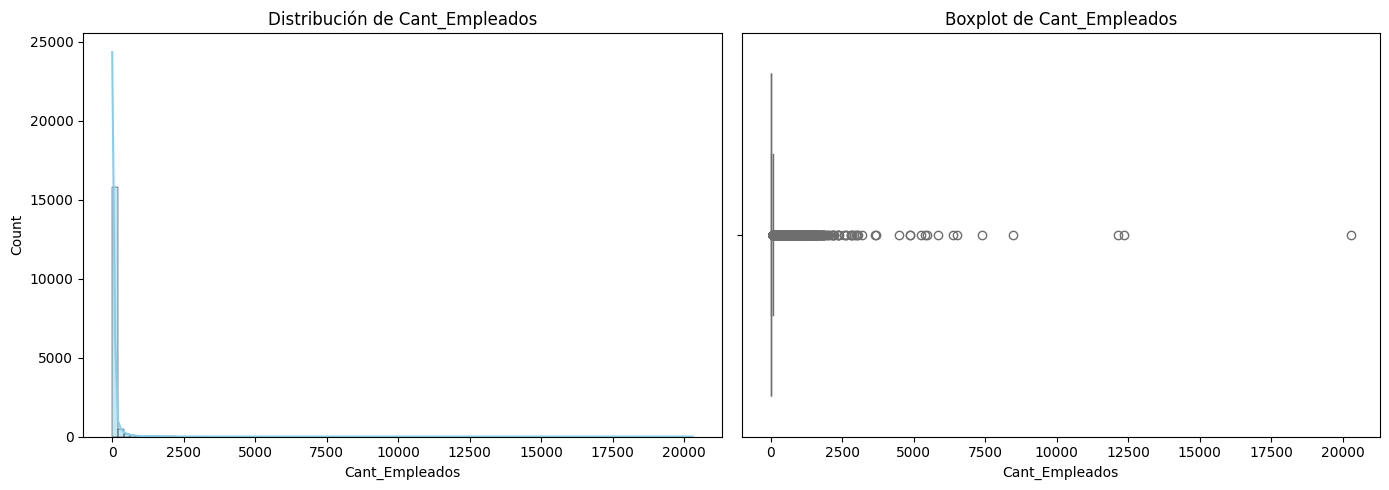

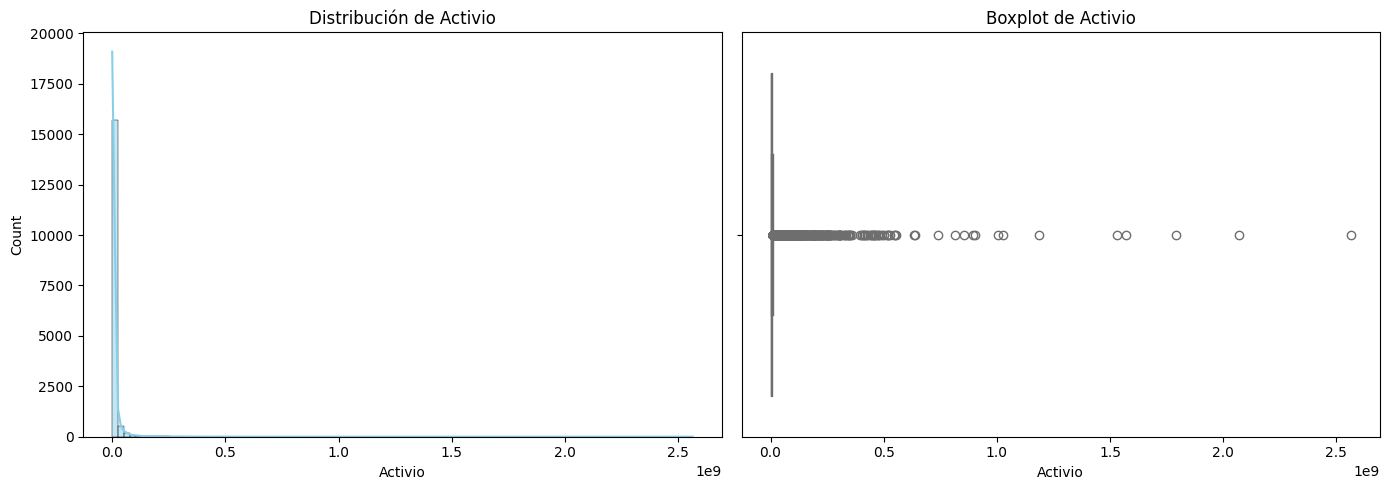

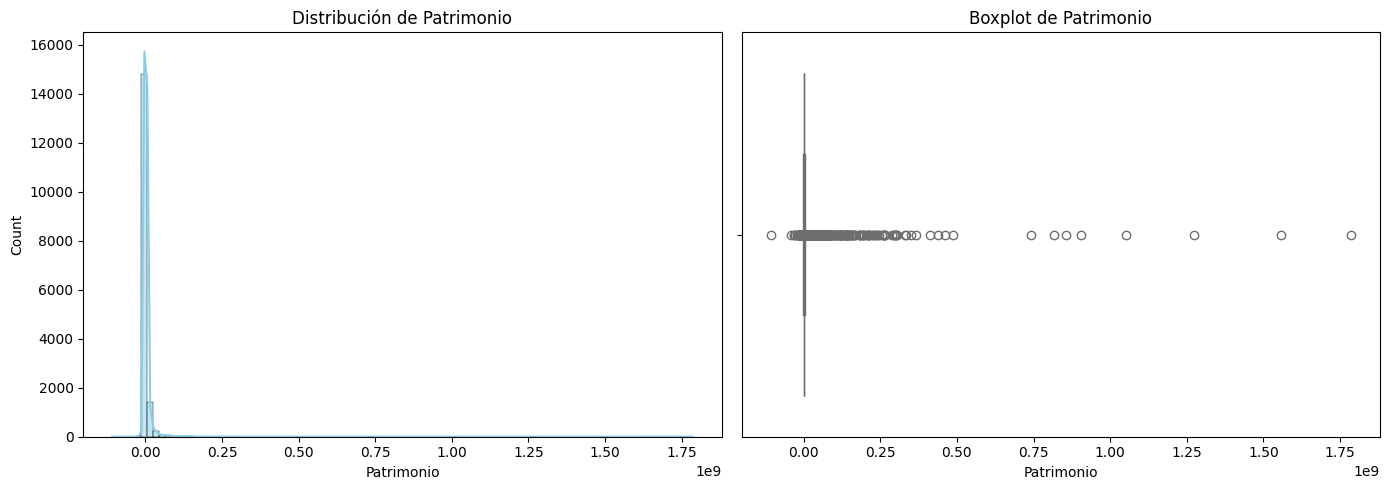

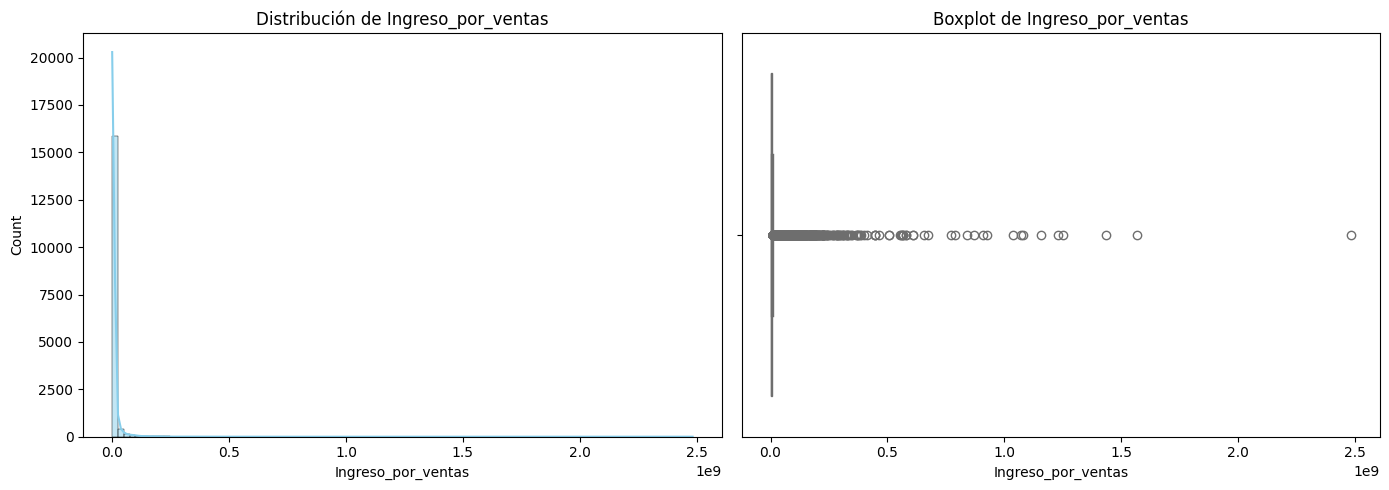

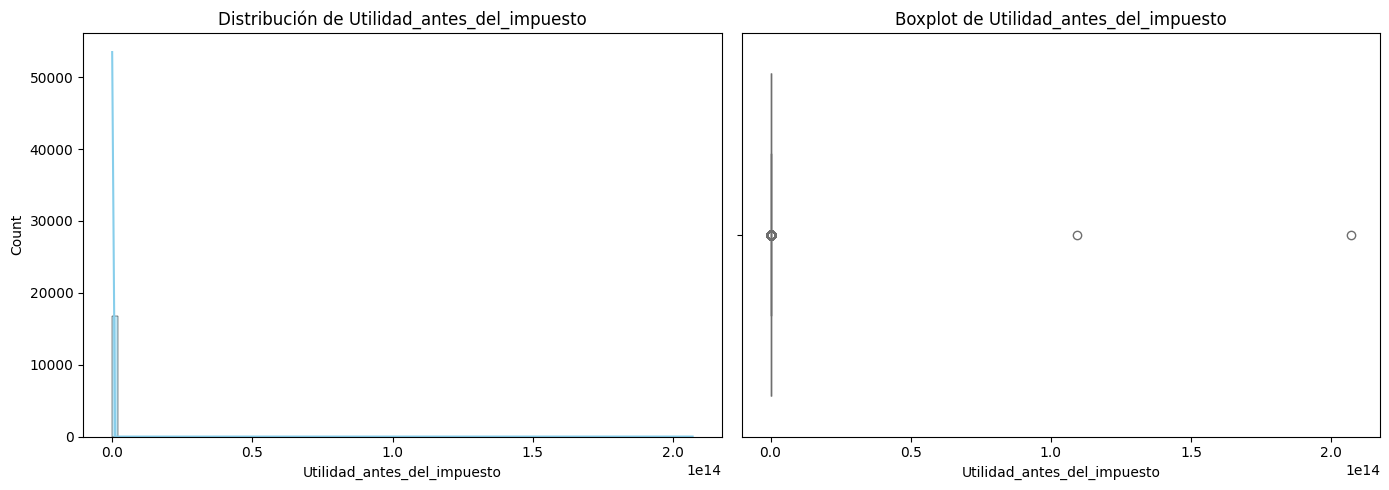

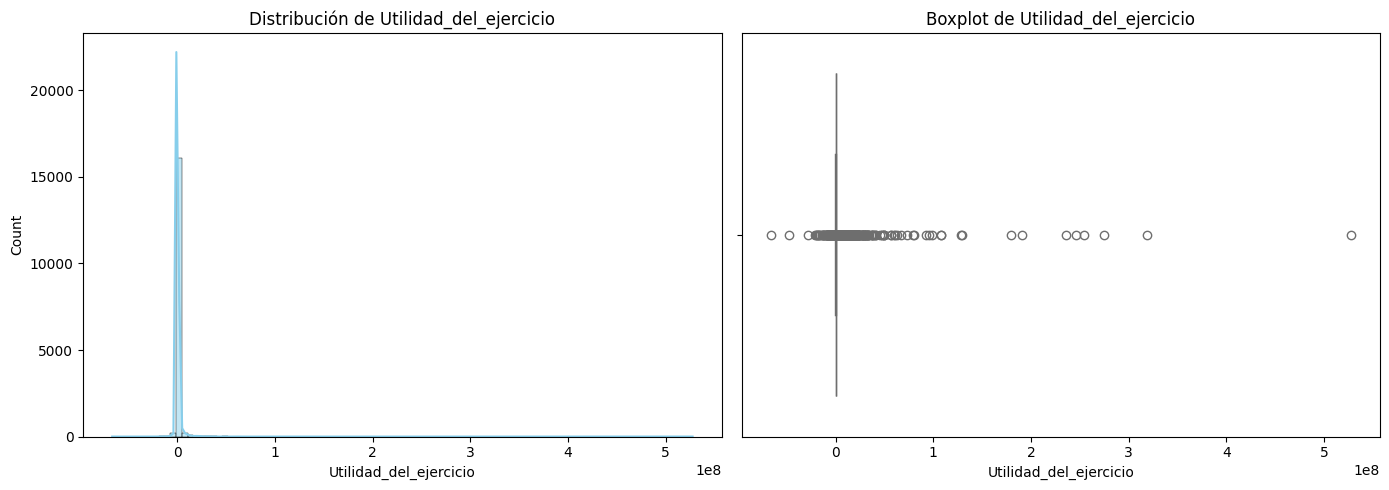

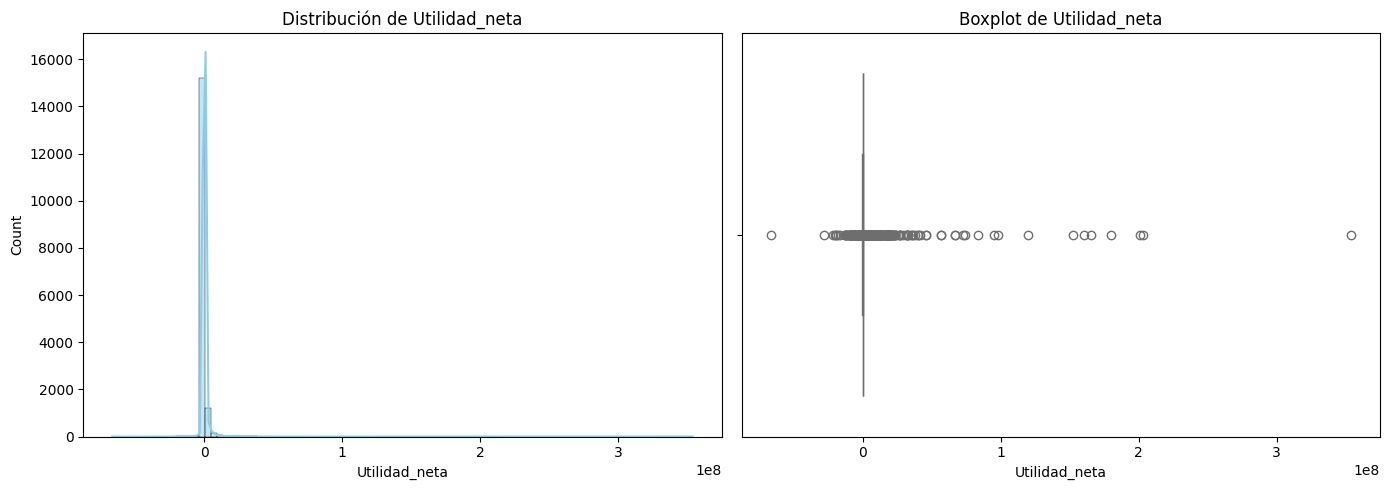

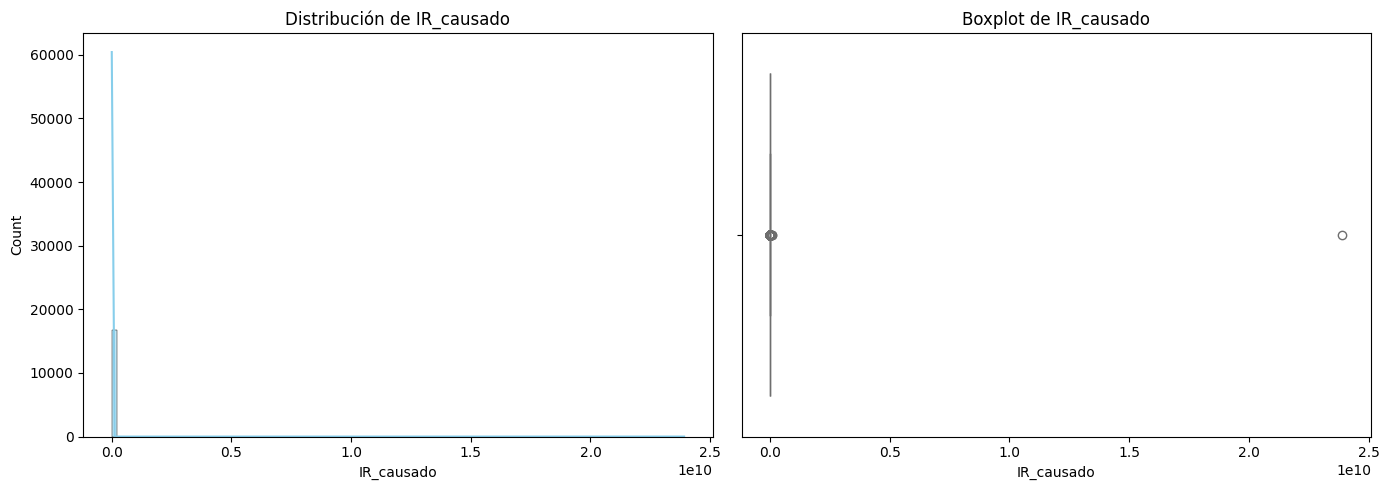

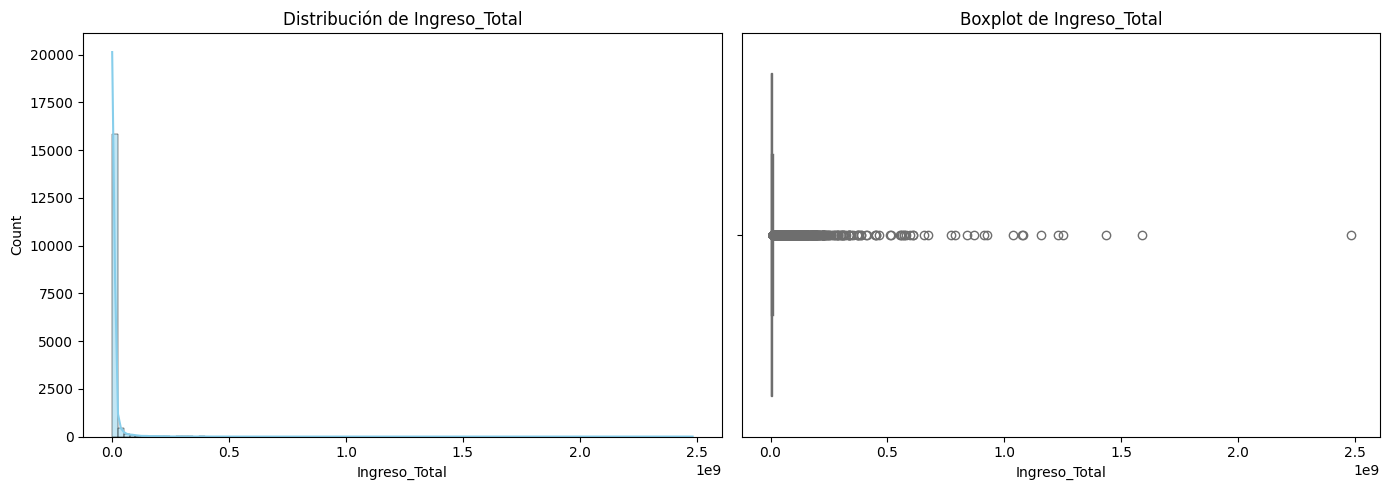

In [45]:
# Visualización: histogramas y boxplots por columna
for col in cols_numericas:
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df[col], bins=100, kde=True, ax=axs[0], color='skyblue')
    axs[0].set_title(f"Distribución de {col}")

    sns.boxplot(x=df[col], ax=axs[1], color='lightcoral')
    axs[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()


In [46]:
print(f"\nTop 10 valores más altos en Cant_Empleados:")
df['Cant_Empleados'].sort_values(ascending=False).head(10)



Top 10 valores más altos en Cant_Empleados:


,Cant_Empleados
5,20292.0
3,12343.0
4373,12142.0
16,8486.0
13,7383.0
37,6520.0
42,6386.0
30,5857.0
87,5468.0
31,5388.0


In [47]:
import pandas as pd

# Lista de columnas numéricas
cols_numericas = [
    'Cant_Empleados', 'Activio', 'Patrimonio',
    'Ingreso_por_ventas', 'Utilidad_antes_del_impuesto',
    'Utilidad_del_ejercicio', 'Utilidad_neta',
    'IR_causado', 'Ingreso_Total'
]

# Función para obtener el filtro sin outliers para una columna
def filtro_sin_outliers(df, columna, factor=1.5):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - factor * IQR
    lim_sup = Q3 + factor * IQR
    return df[columna].between(lim_inf, lim_sup)

# Aplicar filtro para todas las columnas y combinarlos
filtro_general = pd.Series(True, index=df.index)
for col in cols_numericas:
    filtro_col = filtro_sin_outliers(df, col)
    filtro_general &= filtro_col

# DataFrame limpio sin outliers
df_sin_outliers = df[filtro_general].copy()

# Mostrar cantidad de registros antes y después
print(f"Original: {len(df)} registros")
print(f"Filtrado: {len(df_sin_outliers)} registros (sin outliers)")


Original: 16749 registros
Filtrado: 11017 registros (sin outliers)


In [49]:
df_sin_outliers.head(5)

,Posicion,Anio,Posicion_1,Anio_1,Expediente,Nombre,Tipo Compania,Region,Provincia,Ciudad,...,Activio,Patrimonio,Ingreso_por_ventas,Utilidad_antes_del_impuesto,Utilidad_del_ejercicio,Utilidad_neta,IR_causado,Ingreso_Total,Codigo_Actividad,Nombre_Actividad
0,0,0,0,0,181,COMPANIA EMBOTELLADORA INDUSTRIAL LICORERA MAN...,ANÓNIMA,COSTA,MANABI ...,PORTOVIEJO ...,...,4900455.18,1625641.74,2195439.62,144234.34,169687.47,62722.01,106226.79,2195439.62,C1101.01,ELABORACIÓN DE BEBIDAS ALCOHÓLICAS DESTILADAS:...
2,0,0,0,0,21365,COMPANIA AGRICOLA CIVIL SAN JOSE CIA LTDA,RESPONSABILIDAD LIMITADA,COSTA,GUAYAS ...,ELOY ALFARO (DURAN) ...,...,4000.00,4000.00,0.00,0.00,0.00,0.00,0.00,0.00,G4630.99,VENTA AL POR MAYOR DE OTROS PRODUCTOS COMESTIB...
2191,2186,2023,2051,2022,99051,EQUIPOS E INSUMOS MEDICOS JON & DIE MEDICAL S.A.,ANÓNIMA,COSTA,GUAYAS ...,GUAYAQUIL ...,...,11555938.38,310826.11,235871.10,21470.69,25259.62,16552.26,4918.43,239414.00,G4649.24,"VENTA AL POR MAYOR DE INSTRUMENTOS, MATERIALES..."
2192,2187,2023,2737,2022,136803,PREDIAL LA FRAGUA S.A. FRAGUASA,ANÓNIMA,COSTA,GUAYAS ...,GUAYAQUIL ...,...,11548689.03,660946.98,288000.00,-102655.39,-102655.39,-102655.39,0.00,288000.00,L6820.03,ADMINISTRACIÓN DE BIENES INMUEBLES A CAMBIO DE...
2193,2188,2023,2396,2022,121660,THINICORP S.A.,ANÓNIMA,COSTA,GUAYAS ...,GUAYAQUIL ...,...,11547615.36,364562.18,9707449.33,0.00,170933.37,170933.37,50561.05,9883684.57,F4220.11,CONSTRUCCIÓN DE OBRAS DE INGENIERÍA CIVIL RELA...


In [50]:
column_types = df_sin_outliers.dtypes
# Seleccionar columnas coj int64 o float64
numeric_cols = column_types[(column_types == 'int64') | (column_types == 'float64')].index
# Create a new dataframe with only these columns
df_numeric = df_sin_outliers[numeric_cols].copy()
print(df_numeric.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 0 to 16747
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Posicion                     11017 non-null  int64  
 1   Anio                         11017 non-null  int64  
 2   Posicion_1                   11017 non-null  int64  
 3   Anio_1                       11017 non-null  int64  
 4   Expediente                   11017 non-null  int64  
 5   Cant_Empleados               11017 non-null  float64
 6   Activio                      11017 non-null  float64
 7   Patrimonio                   11017 non-null  float64
 8   Ingreso_por_ventas           11017 non-null  float64
 9   Utilidad_antes_del_impuesto  11017 non-null  float64
 10  Utilidad_del_ejercicio       11017 non-null  float64
 11  Utilidad_neta                11017 non-null  float64
 12  IR_causado                   11017 non-null  float64
 13  Ingreso_Total        

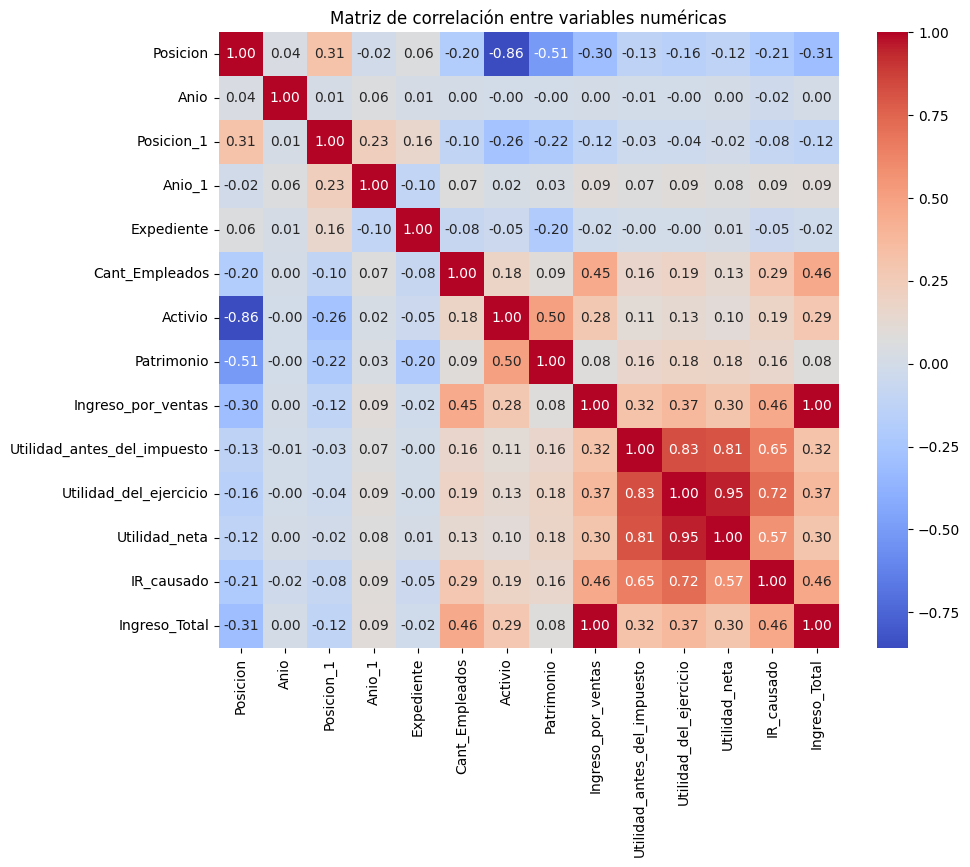

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

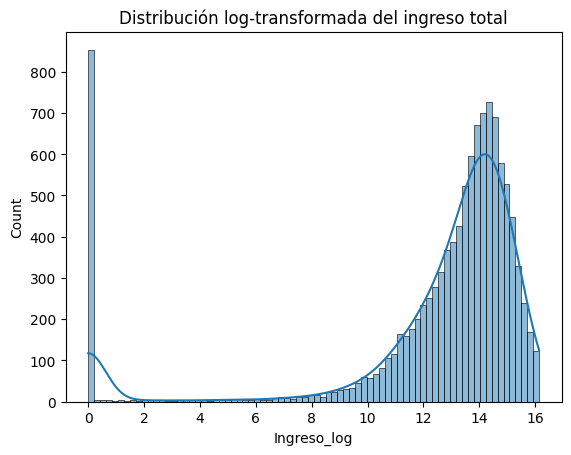

In [52]:
import numpy as np

df_numeric['Ingreso_log'] = np.log1p(df_numeric['Ingreso_Total'])
sns.histplot(df_numeric['Ingreso_log'], kde=True)
plt.title("Distribución log-transformada del ingreso total")
plt.show()

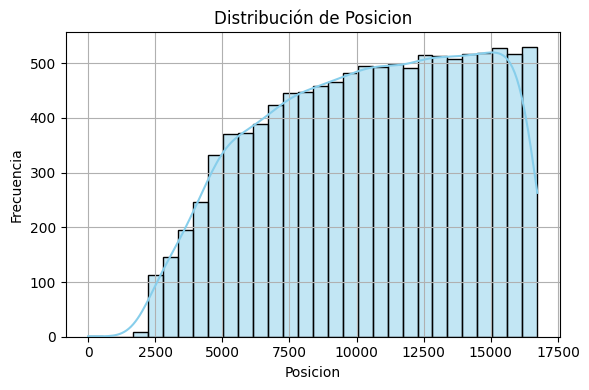

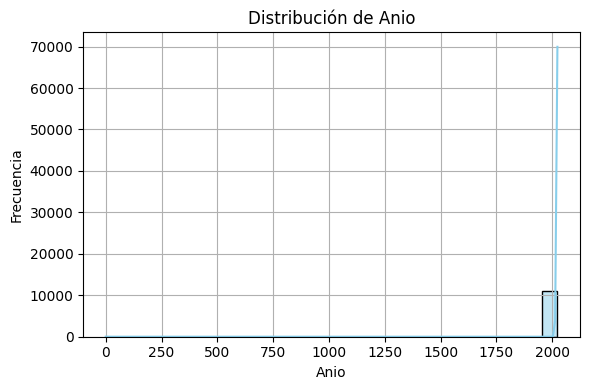

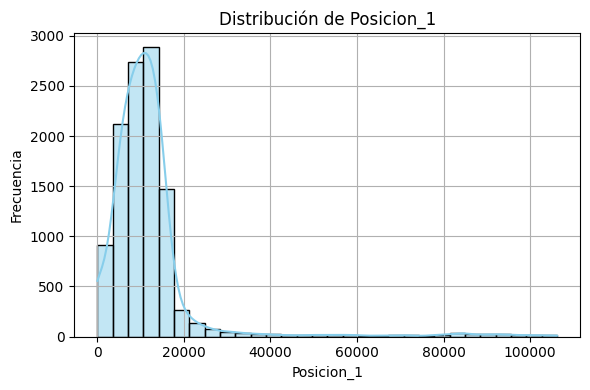

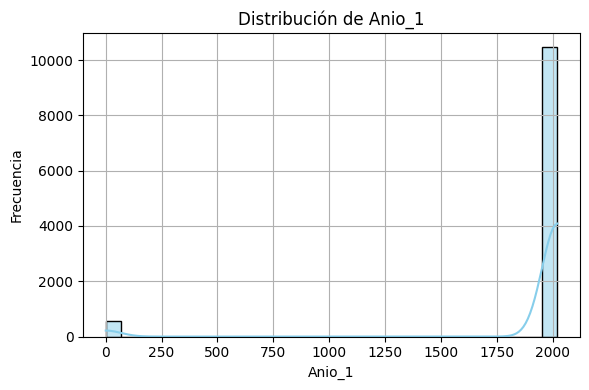

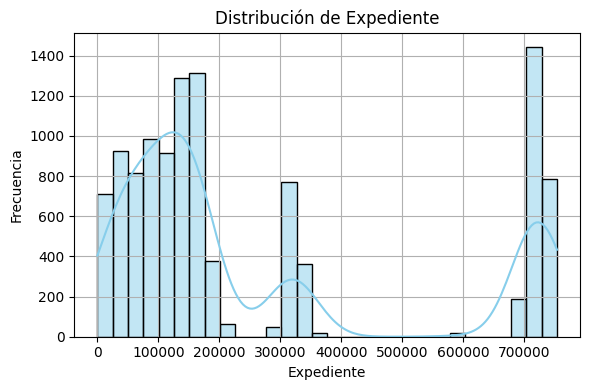

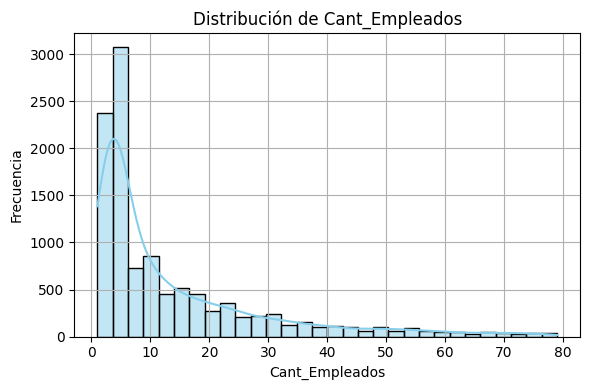

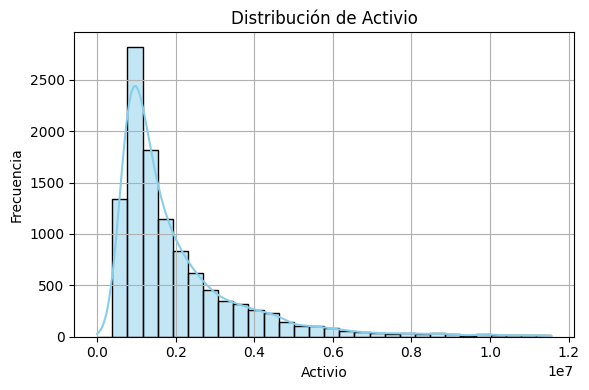

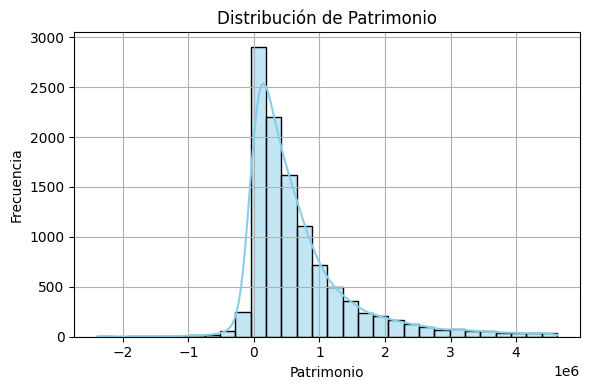

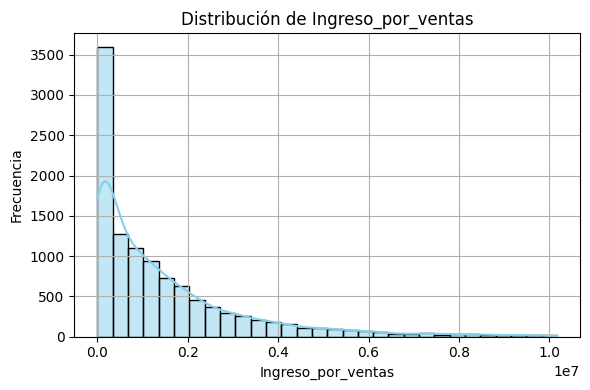

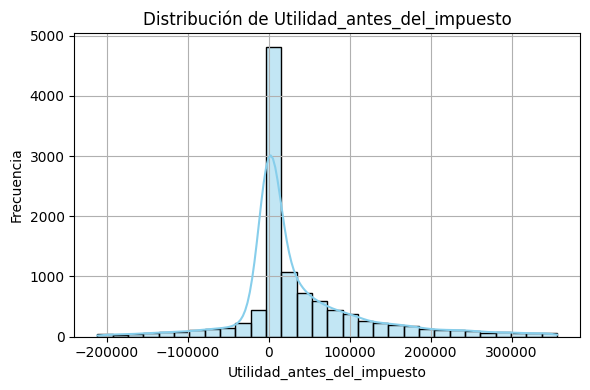

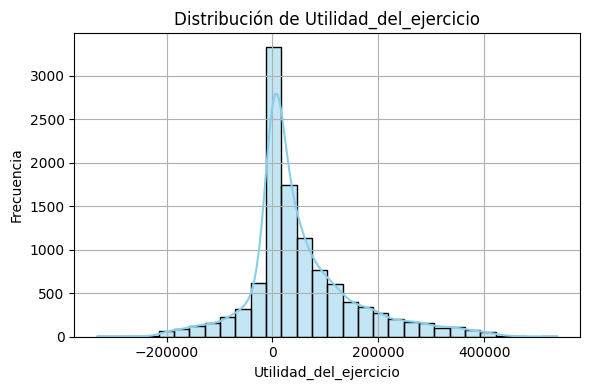

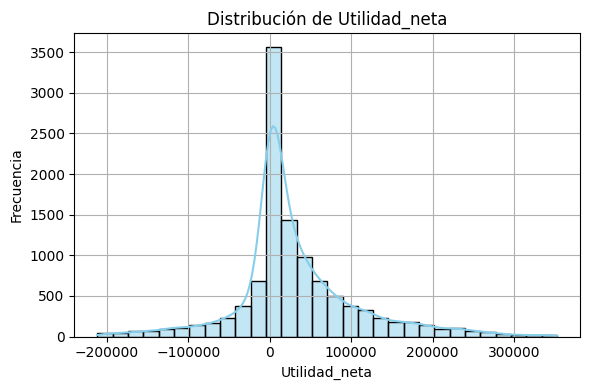

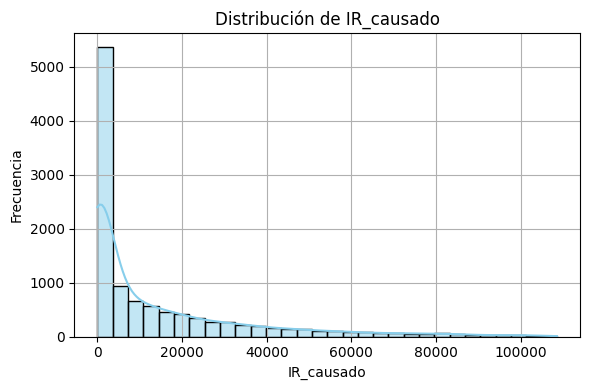

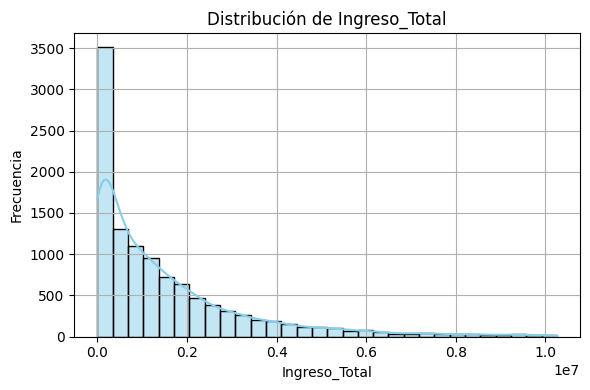

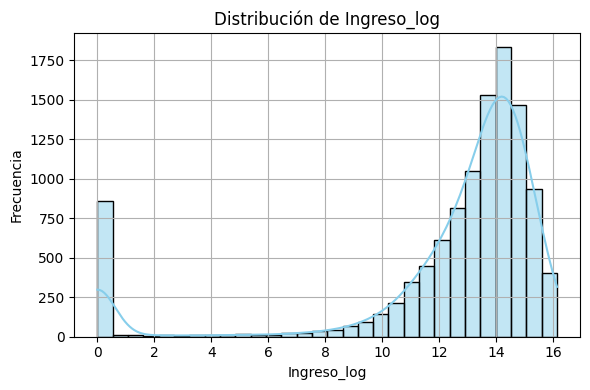

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_numeric[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

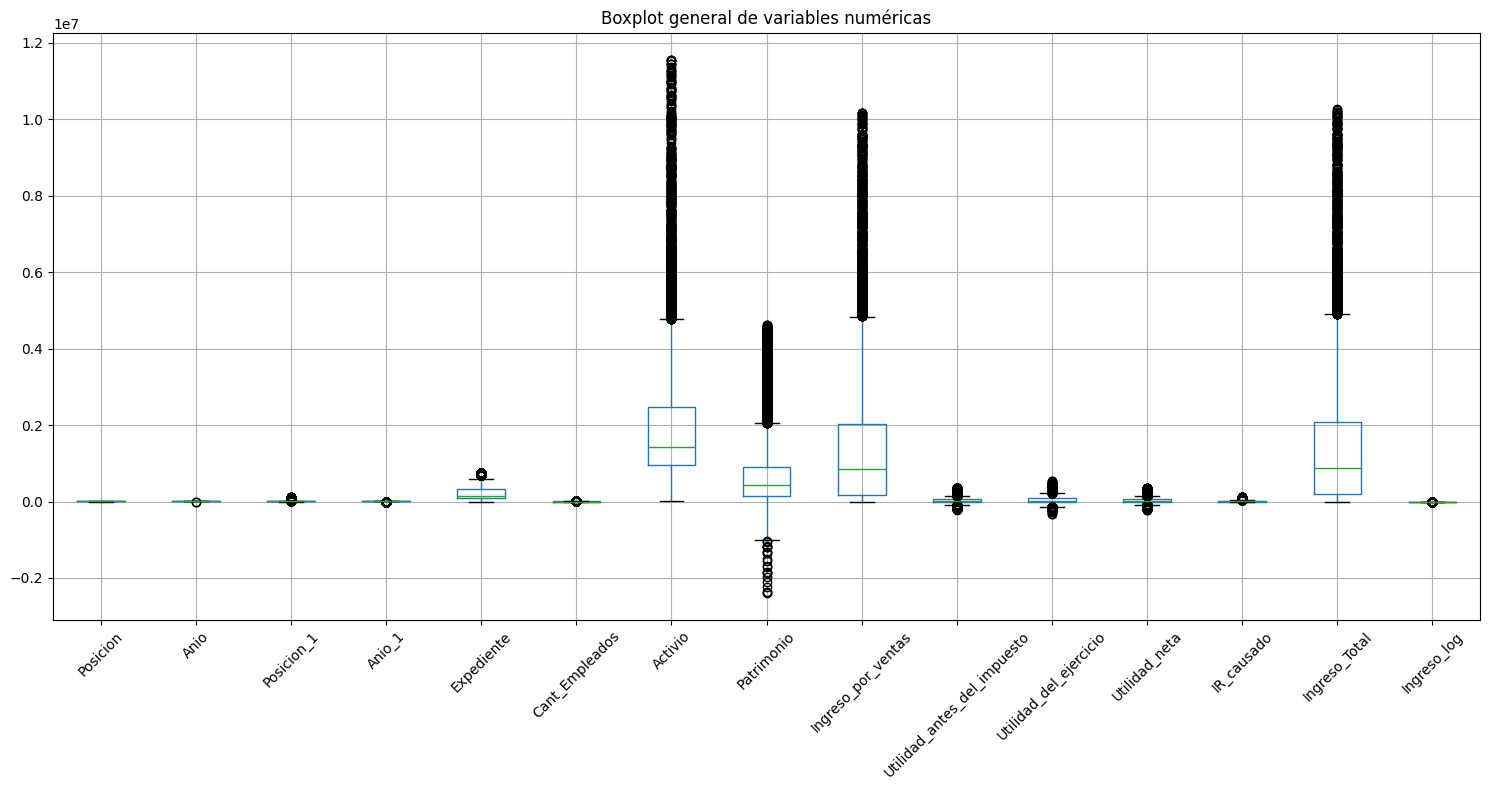

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
df_numeric.boxplot(rot=90)
plt.title('Boxplot general de variables numéricas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()